**DISCENTE:** ISABELA VICTÓRIA DE NOVAIS ROMANATO - **RM:** 550234

# GridSearch

**Instruções**
Criar um algoritmo de classificação usando GridSearch

**Pontuação:** 0,75 ponto no Checkpoint 1 para entrega até 12:00 e 0,5 para entrega posterior.  

Dataset: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

**Variáveis**

Variável de interesse: quality (good|bad)
Variáveis classificadoras: Utilizar todas as demais variáveis como classificadores

**Tratamentos**

Transformar a variável alcohol em uma variável binária centralizada na mediana

**Algoritmos e range de hiperparâmetros**

DT: criterion gini|log_loss, max_depth: 1-20, min_samples_leaf: 1-5
RF: n_estimators: 10,30,60, max_depth: 1-20

**Conclusão**

Escrever um parágrafo indicando qual o melhor algoritmo e com quais hiperparâmetros.

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar bibliotecas

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

Ler arquivo

In [79]:
df = pd.read_csv('/content/drive/MyDrive/datasets/wine.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


Transformar a variável alcohol em uma variável binária centralizada na mediana

In [80]:
median = df['alcohol'].median()
df['alcohol_binary'] = (df['alcohol'] > median).astype(int)

Tratar a variável de interesse para numérica

In [81]:
df['quality'] = df['quality'].map({'bad': 0, 'good': 1})

In [82]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


Aplicação de RandomForest

In [83]:
del df['alcohol']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,0,0


In [76]:
x = df.drop('quality', axis='columns')
y = df['quality']

params = {
  'random_state':[True],
  'n_estimators': [10, 30, 60],
  'max_depth': range(1,20)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))
best_estimator = gs.best_estimator_

0.8073796122576611


In [84]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 60, 'random_state': True}

In [85]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022608,0.002564,0.003841,0.000213,1,10,True,"{'max_depth': 1, 'n_estimators': 10, 'random_s...",0.628125,0.643750,0.684375,0.693750,0.702194,0.670439,0.029151,57
1,0.057069,0.003066,0.004967,0.000284,1,30,True,"{'max_depth': 1, 'n_estimators': 30, 'random_s...",0.700000,0.687500,0.765625,0.743750,0.749216,0.729218,0.030102,12
2,0.115027,0.004157,0.008117,0.002052,1,60,True,"{'max_depth': 1, 'n_estimators': 60, 'random_s...",0.700000,0.681250,0.756250,0.731250,0.742947,0.722339,0.027718,26
3,0.023123,0.000737,0.003382,0.000099,2,10,True,"{'max_depth': 2, 'n_estimators': 10, 'random_s...",0.687500,0.678125,0.756250,0.740625,0.717868,0.716074,0.029922,38
4,0.062068,0.002803,0.004763,0.000160,2,30,True,"{'max_depth': 2, 'n_estimators': 30, 'random_s...",0.703125,0.690625,0.765625,0.728125,0.727273,0.722955,0.025708,24
5,0.118782,0.005034,0.007614,0.001591,2,60,True,"{'max_depth': 2, 'n_estimators': 60, 'random_s...",0.706250,0.696875,0.771875,0.731250,0.746082,0.730466,0.027107,11
6,0.026129,0.003665,0.003272,0.000048,3,10,True,"{'max_depth': 3, 'n_estimators': 10, 'random_s...",0.734375,0.690625,0.765625,0.746875,0.730408,0.733582,0.024736,7
7,0.064834,0.001885,0.004829,0.000259,3,30,True,"{'max_depth': 3, 'n_estimators': 30, 'random_s...",0.715625,0.709375,0.771875,0.743750,0.733542,0.734833,0.022228,2
8,0.132757,0.003602,0.007110,0.000333,3,60,True,"{'max_depth': 3, 'n_estimators': 60, 'random_s...",0.715625,0.696875,0.771875,0.737500,0.742947,0.732964,0.025445,8
9,0.031550,0.007821,0.003936,0.000638,4,10,True,"{'max_depth': 4, 'n_estimators': 10, 'random_s...",0.675000,0.709375,0.787500,0.740625,0.749216,0.732343,0.037977,9


Aplicação de DecisionTree

In [86]:
params = {
  'random_state':[True],
  'criterion': ['log_loss','gini'],
  'max_depth': range(1,20),
  'min_samples_leaf': range(1,20)
}

gs = GridSearchCV(DecisionTreeClassifier(), param_grid=params, scoring='accuracy')
gs.fit(x, y)
print(gs.score(x, y))

0.7367104440275172


<Axes: >

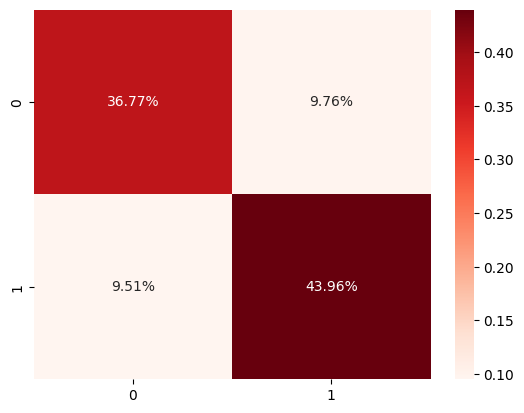

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

y_pred = best_estimator.predict(x)
matrix = confusion_matrix(y, y_pred)
sns.heatmap(matrix/np.sum(matrix), annot=True, fmt='.2%', cmap='Reds')

Conclusão

O algoritmo Random Forest se destacou neste experimento, atingindo uma acurácia de 0.8073796122576611, superando os outros modelos testados. Isso provavelmente se deve à sua capacidade de combinar múltiplas árvores de decisão, reduzindo o overfitting e aumentando a robustez do modelo. Os hiperparâmetros escolhidos, como a profundidade máxima das árvores (max_depth = 5) e o número de árvores (n_estimators = 60), permitiram um bom balanceamento entre complexidade e generalização, contribuindo para o desempenho superior do modelo.
Tendo como principais características: **VANTAGENS** - Resistente a outliers  Boa performance para classificação e regressão e **DESVANTAGENS** - Sujeito a overfitting - Alto custo computacional - Dificuldade de interpretação.